# Import required libraries and load data

In [1]:
#Import Libraries and Load Data
#Load the libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import os
import warnings
warnings.filterwarnings('ignore')

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
%matplotlib inline
pd.set_option("display.max_columns", 300)
pd.set_option("display.max_rows", 300)


pd.set_option
#Importing libraries to pre-process data
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score

#Import package for building conventional supervised learning models
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier

#Import methods for building neural networks
import tensorflow as tf
from tensorflow import keras
from keras import layers
from keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import RMSprop
from keras.callbacks import EarlyStopping

#Import 'KerasClassifier' from 'keras' to connect neural networks with GridSearch and sklearn
from keras.wrappers.scikit_learn import KerasClassifier

In [2]:
##Import Data
churn = pd.read_csv(r'D:\Data Analyst Boot Camp\Assignment Data\Capstone Project\Dataset and Data Description\telecom_churn_data.csv')
churn.head()

,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,109.0,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,4.0,3.0,2.0,6.0,362.0,252.0

# Task 2 Understanding And Exploring The Data

In [3]:
churn.head(10)

,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,109.0,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,4.0,3.0,2.0,6.0,362.0,2

In [4]:
churn.describe()

,circle_id,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
count,99999.0,98981.0,98981.0,99999.000000,99999.000000,99999.000000,99999.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.0,96140.0,94621.0,92254.0,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,946

In [5]:
#Create a backup of data
original = churn.copy()

In [6]:
#create column name list by types of columns
id_cols = ['circle_id']
date_cols = ['last_date_of_month_6','last_date_of_month_7','last_date_of_month_9','date_of_last_rech_6','date_of_last_rech_7','date_of_last_rech_8','date_of_last_rech_9','date_of_last_rech_data_6','date_of_last_rech_data_7','date_of_last_rech_data_8','date_of_last_rech_data_9']
cat_cols = ['night_pck_user_6','night_pck_user_7','night_pck_user_8','night_pck_user_9','fb_user_6', 'fb_user_7','fb_user_8', 'fb_user_9']
num_cols = [column for column in churn.columns if column not in id_cols + date_cols + cat_cols]

#Print the number of columns in each list
print("\#ID cols: %d #Date cols: %d #Numeric cols: %d #Category cols: %d" %(len(id_cols), len(date_cols), len(num_cols), len(cat_cols)))


\#ID cols: 1 #Date cols: 11 #Numeric cols: 205 #Category cols: 8


In [7]:
#Check  we have missed any column or not 
print(len(id_cols)+len(date_cols)+len(num_cols), +len(cat_cols))

217 8


In [8]:
churn.shape[1]

225

In [9]:
#Look for missing value ratio in each column
churn.isnull().sum()/len(churn)*100

circle_id                    0.005000
loc_og_t2o_mou               1.021959
std_og_t2o_mou               1.022959
loc_ic_t2o_mou               1.022959
last_date_of_month_6         0.005000
last_date_of_month_7         0.605976
last_date_of_month_8         1.104956
last_date_of_month_9         1.663933
arpu_6                       0.005000
arpu_7                       0.005000
arpu_8                       0.005000
arpu_9                       0.005000
onnet_mou_6                  3.941842
onnet_mou_7                  3.863845
onnet_mou_8                  5.382785
onnet_mou_9                  7.749690
offnet_mou_6                 3.941842
offnet_mou_7                 3.863845
offnet_mou_8                 5.382785
offnet_mou_9                 7.749690
roam_ic_mou_6                3.941842
roam_ic_mou_7                3.863845
roam_ic_mou_8                5.382785
roam_ic_mou_9                7.749690
roam_og_mou_6                3.941842
roam_og_mou_7                3.863845
roam_og_mou_

In [10]:
###Impute missing values with zeros
#Now that we have the information about the amount of missing values in each colum, we can go ahead and perform some imputing and deleting.
#First we start with the columns corresponding to the recharging of the service\information.

#Some recharge colums have minimum values of 1 while some don't
recharge_cols = ['total_rech_data_6','total_rech_data_7','total_rech_data_8','total_rech_data_9', 'count_rech_2g_6','count_rech_2g_7','count_rech_2g_8','count_rech_2g_9','count_rech_3g_6','count_rech_3g_7','count_rech_3g_8','count_rech_3g_9','max_rech_data_6','max_rech_data_7','max_rech_data_8','max_rech_data_9','av_rech_amt_data_6','av_rech_amt_data_7','av_rech_amt_data_8','av_rech_amt_data_9']
churn[recharge_cols].describe(include = 'all')

,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9
count,25153.000000,25571.000000,26339.000000,25922.000000,25153.000000,25571.000000,26339.000000,25922.000000,25153.000000,25571.000000,26339.000000,25922.000000,25153.000000,25571.000000,26339.000000,25922.00000,25153.000000,25571.000000,26339.000000,25922.000000
mean,2.463802,2.666419,2.651999,2.441170,1.864668,2.044699,2.016288,1.781807,0.599133,0.621720,0.635711,0.659363,126.393392,126.729459,125.717301,124.94144,192.600982,200.981292,197.526489,192.734315
std,2.789128,3.031593,3.074987,2.516339,2.570254,2.768332,2.720132,2.214701,1.274428,1.394524,1.422827,1.411513,108.477235,109.765267,109.437851,111.36376,192.646318,196.791224,191.301305,188.400286
min,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.00000,1.000000,0.500000,0.500000,1.000000
25%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,25.000000,25.000000,25.000000,25.00000,82.000000,92.000000,87.000000,69.000000
50%,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,145.000000,145.000000,145.000000,145.00000,154.000000,154.000000,154.000000,164.000000
75%,3.000000,3.000000,3.000000,3.000000,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,1.000000,1.000000,177.000000,177.000000,179.000000,179.00000,252.000000,252.000000,252.000000,252.000000
max,61.000000,54.000000,60.000000,84.000000,42.000000,48.000000,44.000000,40.000000,29.000000,35.000000,45.000000,49.000000,1555.000000,1555.000000,1555.000000,1555.00000,7546.000000,4365.000000,4076.000000,4061.000000


In [11]:
#Observe whether the date of the last recharge and the total recharge data value are missing together
#You can do this by displaying the rows that have null values in the these two variables.
churn_nan = churn.dropna(subset= ['total_rech_data_6','total_rech_data_7','total_rech_data_8','total_rech_data_9','last_day_rch_amt_6','last_day_rch_amt_7','last_day_rch_amt_8','last_day_rch_amt_9'], how='any')
churn_nan.head()

,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
33,109.0,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,977.020,2362.833,409.230,799.356,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.56,0.0,0.00,0.00,0.00,0.00,0.0,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.70,0.00,0.00,0.56,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.56,1.70,1.75,0.56,2.45,0.41,0.00,0.00,37.93,8.01,1.73,0.31,0.16,9.81,3.48,0.88,40.54,18.24,0.00,2.91,0.05,8.53,2.95,1.78,0.86,15.79,0.23,0.96,0.13,9.81,0.0,0.0,0.0,0.0,3.18,5.66,1.04,34.14,7.89,7.19,41.79,114.16,0.00,0.0,

In [12]:
#Now that we have the information about the amount of missing values in each colum, we can perform some imputing and deleting
#First we will start with the columns corresponding to the "recharging of the service" information.
recharge_cols = ['total_rech_data_6','total_rech_data_7','total_rech_data_8','total_rech_data_9','count_rech_2g_6','count_rech_2g_7','count_rech_2g_8','count_rech_2g_9','count_rech_3g_6','count_rech_3g_7','count_rech_3g_8','count_rech_3g_9','max_rech_data_6','max_rech_data_7','max_rech_data_8','max_rech_data_9','av_rech_amt_data_6','av_rech_amt_data_7','av_rech_amt_data_8','av_rech_amt_data_9']
churn[recharge_cols].describe(include = 'all')


,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9
count,25153.000000,25571.000000,26339.000000,25922.000000,25153.000000,25571.000000,26339.000000,25922.000000,25153.000000,25571.000000,26339.000000,25922.000000,25153.000000,25571.000000,26339.000000,25922.00000,25153.000000,25571.000000,26339.000000,25922.000000
mean,2.463802,2.666419,2.651999,2.441170,1.864668,2.044699,2.016288,1.781807,0.599133,0.621720,0.635711,0.659363,126.393392,126.729459,125.717301,124.94144,192.600982,200.981292,197.526489,192.734315
std,2.789128,3.031593,3.074987,2.516339,2.570254,2.768332,2.720132,2.214701,1.274428,1.394524,1.422827,1.411513,108.477235,109.765267,109.437851,111.36376,192.646318,196.791224,191.301305,188.400286
min,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.00000,1.000000,0.500000,0.500000,1.000000
25%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,25.000000,25.000000,25.000000,25.00000,82.000000,92.000000,87.000000,69.000000
50%,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,145.000000,145.000000,145.000000,145.00000,154.000000,154.000000,154.000000,164.000000
75%,3.000000,3.000000,3.000000,3.000000,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,1.000000,1.000000,177.000000,177.000000,179.000000,179.00000,252.000000,252.000000,252.000000,252.000000
max,61.000000,54.000000,60.000000,84.000000,42.000000,48.000000,44.000000,40.000000,29.000000,35.000000,45.000000,49.000000,1555.000000,1555.000000,1555.000000,1555.00000,7546.000000,4365.000000,4076.000000,4061.000000


In [13]:
#Observe whether the date of the last recharge and the total recharge data value are missing together
#You can do this by displaying the rows that have null values in these two variables
def nans(recharge_cols): return churn[churn.isnull().any(axis = 1)]
nans(recharge_cols)

,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,109.0,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,4.0,3.0,2.0,6.0,362.0,252.0

In [14]:
#In the recharge variales where minimum value is 1, we can impute missing values with zeros since it means customers didn't recharge their number that month.
#Create a list of recharge columns where we will impute missing values with zeros.
zero_impute = [['total_rech_data_6','total_rech_data_7','total_rech_data_8','total_rech_data_9','av_rech_amt_data_6','av_rech_amt_data_7','av_rech_amt_data_8','av_rech_amt_data_9','max_rech_data_6','max_rech_data_7','max_rech_data_8','max_rech_data_9']]
zero_impute


[['total_rech_data_6',
  'total_rech_data_7',
  'total_rech_data_8',
  'total_rech_data_9',
  'av_rech_amt_data_6',
  'av_rech_amt_data_7',
  'av_rech_amt_data_8',
  'av_rech_amt_data_9',
  'max_rech_data_6',
  'max_rech_data_7',
  'max_rech_data_8',
  'max_rech_data_9']]

In [15]:
#impute missing values with 0 for the above mentioned list of recharge columns
churn[['total_rech_data_6','total_rech_data_7','total_rech_data_8','total_rech_data_9','av_rech_amt_data_6','av_rech_amt_data_7','av_rech_amt_data_8','av_rech_amt_data_9','max_rech_data_6','max_rech_data_7','max_rech_data_8','max_rech_data_9']] = churn[['total_rech_data_6','total_rech_data_7','total_rech_data_8','total_rech_data_9','av_rech_amt_data_6','av_rech_amt_data_7','av_rech_amt_data_8','av_rech_amt_data_9','max_rech_data_6','max_rech_data_7','max_rech_data_8','max_rech_data_9']].fillna(0)
churn.head()

,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,109.0,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,4.0,3.0,2.0,6.0,362.0,252.0

In [16]:
#Let's make sure our values are imputed correctly
print("\Missing value ratio:")
print(churn.isnull().sum()*100/churn.shape[1])

\Missing value ratio:
circle_id                       2.222222
loc_og_t2o_mou                454.222222
std_og_t2o_mou                454.666667
loc_ic_t2o_mou                454.666667
last_date_of_month_6            2.222222
last_date_of_month_7          269.333333
last_date_of_month_8          491.111111
last_date_of_month_9          739.555556
arpu_6                          2.222222
arpu_7                          2.222222
arpu_8                          2.222222
arpu_9                          2.222222
onnet_mou_6                  1752.000000
onnet_mou_7                  1717.333333
onnet_mou_8                  2392.444444
onnet_mou_9                  3444.444444
offnet_mou_6                 1752.000000
offnet_mou_7                 1717.333333
offnet_mou_8                 2392.444444
offnet_mou_9                 3444.444444
roam_ic_mou_6                1752.000000
roam_ic_mou_7                1717.333333
roam_ic_mou_8                2392.444444
roam_ic_mou_9                3444.4

In [17]:
#Summary
print("\Summary Statistics:")
churn.describe()

\Summary Statistics:


,circle_id,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
count,99999.0,98981.0,98981.0,99999.000000,99999.000000,99999.000000,99999.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.0,96140.0,94621.0,92254.0,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,946

In [18]:
print("\Shape before dropping:",churn.shape) 

\Shape before dropping: (100004, 225)


In [19]:
#Drop ID and all the date columns
churn.drop(list(churn.filter(regex='id|date')), axis = 1, inplace = True)
churn.head()

,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,0.0,0.0,0.0,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,4.0,3.0,2.0,6.0,362.0,252.0,252.0,0.0,252.0,252.0,252.0,0.0,252.0,252.0,252.0,0.0,1.0,1.0,1.0,0.0,252.0,252.0,252.0,0.0,0.0,0.0,0.0,NaN,1.0,1.0,1.0,NaN,252.0,252.0,252.0,0.0,30.13,1.32,5.75,0.0,83.57,150.76,109.61,0.00,212.17,212.17,212.17,NaN,212.17,212.17,212.17,NaN,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.

In [20]:
print("\Shape after dropping:",churn.shape)

\Shape after dropping: (100004, 212)


In [21]:
#We will replace missing values with'-1' in catergorical columms
churn.fillna({'night_pck_user_6': -1, 'night_pck_user_7':-1, 'night_pck_user_8': -1,'night_pck_user_9':-1,'fb_user_6':-1, 'fb_user_7': -1, 'fb_user_8': -1, 'fb_user_9': -1}).head()


,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,0.0,0.0,0.0,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,4.0,3.0,2.0,6.0,362.0,252.0,252.0,0.0,252.0,252.0,252.0,0.0,252.0,252.0,252.0,0.0,1.0,1.0,1.0,0.0,252.0,252.0,252.0,0.0,0.0,0.0,0.0,NaN,1.0,1.0,1.0,NaN,252.0,252.0,252.0,0.0,30.13,1.32,5.75,0.0,83.57,150.76,109.61,0.00,212.17,212.17,212.17,NaN,212.17,212.17,212.17,NaN,0.0,0.0,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0

In [22]:
#let's make sure our values are imputed correctly
print("\Missing value ratio:")
print(churn[cat_cols].isnull().sum()*100/churn.shape[0])

\Missing value ratio:
night_pck_user_6    74.848006
night_pck_user_7    74.430023
night_pck_user_8    73.662054
night_pck_user_9    74.079037
fb_user_6           74.848006
fb_user_7           74.430023
fb_user_8           73.662054
fb_user_9           74.079037
dtype: float64


In [23]:
#Drop variables with more than a given threshold of missing values
initial_cols = churn.shape[1]

#Insert the thereshold value of missing entries
perc = 70 

#Extract a list of columns that have more than 70% of its elements missing 

missing_threshold = int(((100-perc)/100)*churn.shape[0] +1)
modified_churn = churn.dropna(axis = 1, thresh = missing_threshold)

#Here we will remove the columns with more than 70% of it's elements missing
missing_threshold = int(((100-perc)/100)*churn.shape[0] +1)
churn = churn.dropna(axis = 1, thresh = missing_threshold)

print("Modified Churn:")
churn.head()


Modified Churn:


,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,0.0,0.0,0.0,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,4.0,3.0,2.0,6.0,362.0,252.0,252.0,0.0,252.0,252.0,252.0,0.0,252.0,252.0,252.0,0.0,1.0,1.0,1.0,0.0,252.0,252.0,252.0,0.0,252.0,252.0,252.0,0.0,30.13,1.32,5.75,0.0,83.57,150.76,109.61,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,968.0,30.4,0.0,101.20,3.58
1,0.0,0.0,0.0,34.047,355.074,268.321,86.285,24.11,78.68,7.68,18.34,15.74,99.84,304.76,53.76,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.00,23.88,74.56,7.68,18.34,11.51,75.94,291.86,53.76,0.00,0.00,0.00,0.00,0.0,2.91,0.00,0.00,35.39,150.51,299.54,72.11,0.23,4.11,0.00,0.00,0.00,0.46,0.13,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.23,4.58,0.13,0.00,0.0,0.0,0.0,0.0,4.68,23.43,12.76,0.00,0.00,0.0,

In [24]:
#Display the number of columns dropped
len(churn.index == 1)

100004

In [25]:
#Look at the missing values in each column
churn.isnull().sum()*100/churn.shape[0]

loc_og_t2o_mou        1.021959
std_og_t2o_mou        1.022959
loc_ic_t2o_mou        1.022959
arpu_6                0.005000
arpu_7                0.005000
arpu_8                0.005000
arpu_9                0.005000
onnet_mou_6           3.941842
onnet_mou_7           3.863845
onnet_mou_8           5.382785
onnet_mou_9           7.749690
offnet_mou_6          3.941842
offnet_mou_7          3.863845
offnet_mou_8          5.382785
offnet_mou_9          7.749690
roam_ic_mou_6         3.941842
roam_ic_mou_7         3.863845
roam_ic_mou_8         5.382785
roam_ic_mou_9         7.749690
roam_og_mou_6         3.941842
roam_og_mou_7         3.863845
roam_og_mou_8         5.382785
roam_og_mou_9         7.749690
loc_og_t2t_mou_6      3.941842
loc_og_t2t_mou_7      3.863845
loc_og_t2t_mou_8      5.382785
loc_og_t2t_mou_9      7.749690
loc_og_t2m_mou_6      3.941842
loc_og_t2m_mou_7      3.863845
loc_og_t2m_mou_8      5.382785
loc_og_t2m_mou_9      7.749690
loc_og_t2f_mou_6      3.941842
loc_og_t

In [26]:
churn=churn.drop('loc_og_t2o_mou', axis =1)

In [27]:
#Impute missing values using MICE
import sys
sys.path.append('/home/anhata/utils')
import utils
from sklearn.utils import _safe_indexing
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.linear_model import LinearRegression
#So we will use linear regression for filling the missing values in the rest of the numeric columns
churn_cols = churn.columns
lr = LinearRegression()
#Using MICE techniques to impute missing values in the rest of the columns

#Implement the Iterative Imputer technique to impute appropriate values in the missing entries of the rest of the numeric columns
#Note: Set the missing entries of the rest of the numeric columns.
#Note: Set the 'estimator' parameter to 'lr' - This specifies we will be using linear regression to estimate the missing values
#Note: Set the 'missing values'parameter to 'np.nan' - This specifies that we have impute in entries which are NaNs
#Note: Set the 'max_iter' parameter to '1' - This specifies the number of iterations the algorithm scans through the data set

#To converge the appropriate values it is going to impute in the missing entries.It takes around 6 mins to run.
#Note: Set the 'verbose' parameter to '2' -  This specifies the amount of details it will show whil imputing
#Note: Set the 'imputation_order' parameter to 'roman' - This specifies the order in which features will be imputed.'roman' means left to right
#Note: Set the 'random_state' parameter to '0' - This is for reproducibility

imp = IterativeImputer(missing_values = np.nan, max_iter = 1, 
                       verbose = 2, estimator = lr, imputation_order = 'roman', random_state = 0)                    
churn = imp.fit_transform(churn)                 
churn


[IterativeImputer] Completing matrix with shape (100004, 187)
[IterativeImputer] Ending imputation round 1/1, elapsed time 718.18
[IterativeImputer] Change: 5949246858.38704, scaled tolerance: 45.735400000000006 


array([[ 0.00000000e+00,  0.00000000e+00,  1.97385000e+02, ...,
         0.00000000e+00,  1.01200000e+02,  3.58000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  3.40470000e+01, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  1.67690000e+02, ...,
         0.00000000e+00,  4.17000000e+00,  0.00000000e+00],
       ...,
       [ 0.00000000e+00,  0.00000000e+00,  2.78481074e+02, ...,
         6.69551839e+06,  2.33423554e+07, -2.36449676e+06],
       [ 0.00000000e+00,  0.00000000e+00,  2.78481074e+02, ...,
         6.69551839e+06,  2.33423554e+07, -2.36449676e+06],
       [ 0.00000000e+00,  0.00000000e+00,  2.78481074e+02, ...,
         6.69551839e+06,  2.33423554e+07, -2.36449676e+06]])

In [28]:
#convert imputed numpy array to pandas dataframe
churn  = pd.DataFrame(churn, columns = churn_cols)
print(churn.isnull().sum()*churn.shape[0])

std_og_t2o_mou        0
loc_ic_t2o_mou        0
arpu_6                0
arpu_7                0
arpu_8                0
arpu_9                0
onnet_mou_6           0
onnet_mou_7           0
onnet_mou_8           0
onnet_mou_9           0
offnet_mou_6          0
offnet_mou_7          0
offnet_mou_8          0
offnet_mou_9          0
roam_ic_mou_6         0
roam_ic_mou_7         0
roam_ic_mou_8         0
roam_ic_mou_9         0
roam_og_mou_6         0
roam_og_mou_7         0
roam_og_mou_8         0
roam_og_mou_9         0
loc_og_t2t_mou_6      0
loc_og_t2t_mou_7      0
loc_og_t2t_mou_8      0
loc_og_t2t_mou_9      0
loc_og_t2m_mou_6      0
loc_og_t2m_mou_7      0
loc_og_t2m_mou_8      0
loc_og_t2m_mou_9      0
loc_og_t2f_mou_6      0
loc_og_t2f_mou_7      0
loc_og_t2f_mou_8      0
loc_og_t2f_mou_9      0
loc_og_t2c_mou_6      0
loc_og_t2c_mou_7      0
loc_og_t2c_mou_8      0
loc_og_t2c_mou_9      0
loc_og_mou_6          0
loc_og_mou_7          0
loc_og_mou_8          0
loc_og_mou_9    

In [29]:
#Now that we have removed and filled missing data from the data set.
#We will now proceed to feature engineering to futher perpare the data for testing machine learning and deep learning.

In [30]:
#Filter high-value customers
###Calculate total data recharge.Calculate and store the total data recharge amount.
#
total_data_rec_6 = churn[['total_rech_num_6']].sum()
total_data_rec_6
total_data_rec_7 = churn[['total_rech_num_7']].sum()
total_data_rec_7
total_data_rec_8 = churn[['total_rech_num_8']].sum()
total_data_rec_8
total_data_rec_9 = churn[['total_rech_num_9']].sum()
total_data_rec_9

total_rech_num_6   -2.501711e+06
dtype: float64

total_rech_num_7   -3.306326e+06
dtype: float64

total_rech_num_8   -8.998692e+06
dtype: float64

total_rech_num_9    2.140412e+07
dtype: float64

In [31]:
#Calculate and store total recharge amount + total data recharge amount --number of data recharges * average data recharge amount
churn['total_rech_amount_6'] = churn['total_rech_data_6']*churn['av_rech_amt_data_6']
churn['total_rech_amount_7'] = churn['total_rech_data_7']*churn['av_rech_amt_data_7']
churn['total_rech_amount_8'] = churn['total_rech_data_8']*churn['av_rech_amt_data_8']
churn['total_rech_amount_9'] = churn['total_rech_data_9']*churn['av_rech_amt_data_9']
churn.head(3)

,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,total_rech_amount_6,total_rech_amount_7,total_rech_amount_8,total_rech_amount_9
0,0.0,0.0,197.385,214.816,213.803,21.100,-1574.850933,2151.107792,0.00,4598.299452,-842.058198,481.981705,0.00,1006.246969,40165.145073,45575.179391,0.0,52974.586826,1297.691956,2719.86097,0.0,1770.218919,40.652383,27.883246,0.00,29.836633,92.141148,90.275506,0.00,90.35261,3.646558,3.748568,0.00,3.625448,-6730.6106,-7914.677645,0.00,-10262.55205,10.634527,-14.487733,0.00,-17.270739,90.313224,93.310195,0.00,92.317214,87.937513,91.335906,0.00,86.321441,1.151795,1.129425,0.00,1.050214,0.0,0.0,0.0,0.0,121.70569,126.741998,0.00,122.457327,-115.947336,-101.914223,0.0,-100.369221,-3.914761,-0.63156,0.00,3.856396,0.12392,-0.138749,0.0,0.030271,0.00,0.00,0.00,0.00,52.909688,46.532168,0.16,52.556047,107.275611,106.982285,4.13,106.145174,12.063242,12.592533,1.15,12.171538,70.34319,61.068278,5.44,65.816972,23.200684,23.234504,0.00,24.32639,21.891661,22.726601,0.00,19.753661,2.227385,2.278367,0.00,2.180137,0.0,0.0,0.0,0.0,2.003528,1.812028,0.00,0.813799,0.00,0.00,5.44,0.00,-65.570784,-63.354347,0.0,-67.569399,1.731719,3.206897,0.0,7.331063,0.427501,0.74319,0.0,0.978333,4.0,3.0,2.0,6.0,362.0,252.0,252.0,0.0,252.0,252.0,252.0,0.0,252.0,252.0,252.0,0.0,1.0,1.0,1.0,0.

In [32]:
#Calculate and store total recharge amount for calling and internet data for June --Total call recharge amount + total data recharge amount
churn['comb_rech_amt_6'] = churn.loc[:,['total_rech_amt_6','total_rech_data_6']].sum(axis=1)

#Calculate and store the total data recharge amount for July --number of data rechages * average data rechage

churn['total_data_rech_amt_7'] = churn.total_rech_num_7 * churn.av_rech_amt_data_7

#Calculate and store total recharge amount for call and internet for July -- total call recharge amount + total data recharge amount
churn['comb_rech_amt_7'] = churn.loc[:,['total_rech_amt_7','total_rech_data_7']].sum(axis=1)
churn.head(3)

,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,total_rech_amount_6,total_rech_amount_7,total_rech_amount_8,total_rech_amount_9,comb_rech_amt_6,total_data_rech_amt_7,comb_rech_amt_7
0,0.0,0.0,197.385,214.816,213.803,21.100,-1574.850933,2151.107792,0.00,4598.299452,-842.058198,481.981705,0.00,1006.246969,40165.145073,45575.179391,0.0,52974.586826,1297.691956,2719.86097,0.0,1770.218919,40.652383,27.883246,0.00,29.836633,92.141148,90.275506,0.00,90.35261,3.646558,3.748568,0.00,3.625448,-6730.6106,-7914.677645,0.00,-10262.55205,10.634527,-14.487733,0.00,-17.270739,90.313224,93.310195,0.00,92.317214,87.937513,91.335906,0.00,86.321441,1.151795,1.129425,0.00,1.050214,0.0,0.0,0.0,0.0,121.70569,126.741998,0.00,122.457327,-115.947336,-101.914223,0.0,-100.369221,-3.914761,-0.63156,0.00,3.856396,0.12392,-0.138749,0.0,0.030271,0.00,0.00,0.00,0.00,52.909688,46.532168,0.16,52.556047,107.275611,106.982285,4.13,106.145174,12.063242,12.592533,1.15,12.171538,70.34319,61.068278,5.44,65.816972,23.200684,23.234504,0.00,24.32639,21.891661,22.726601,0.00,19.753661,2.227385,2.278367,0.00,2.180137,0.0,0.0,0.0,0.0,2.003528,1.812028,0.00,0.813799,0.00,0.00,5.44,0.00,-65.570784,-63.354347,0.0,-67.569399,1.731719,3.206897,0.0,7.331063,0.427501,0.74319,0.0,0.978333,4.0,3.0,2.0,6.0,362.0,252.0,252.0,0.0,252.

In [33]:
#Calculate average data recharge amount done by customer in June and July
churn[['av_rech_amt_data_6']].mean()
churn[['av_rech_amt_data_7']].mean()

av_rech_amt_data_6    48.442987
dtype: float64

av_rech_amt_data_7    51.39087
dtype: float64

In [34]:
#Evaluate and display the 70th percentile average data recharge amount of June and July
churn[['av_rech_amt_data_6','av_rech_amt_data_7']].quantile(.70)

#Retain only those customers who have recharged their mobiles with more than or equal to 70% percentile.
#You have to see whether each customer row has the average data recharge amount more than 70% percentile of the average data recharge amount.
churn.av_rech_amt_data_6.quantile(0.7)
churn.av_rech_amt_data_7.quantile(0.7)

churn.dropna().quantile([0.0])

av_rech_amt_data_6    0.0
av_rech_amt_data_7    0.0
Name: 0.7, dtype: float64

0.0

0.0

,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,total_rech_amount_6,total_rech_amount_7,total_rech_amount_8,total_rech_amount_9,comb_rech_amt_6,total_data_rech_amt_7,comb_rech_amt_7
0.0,0.0,0.0,-2258.709,-2014.045,-945.808,-1899.505,-1596.578542,-1.061455e+09,-4.214481e+08,-1.996287e+08,-3.527611e+08,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.618543e+08,-1.712897e+08,-1.279312e+08,-6.476735e+07,0.0,0.0,-2556.960093,-23800.128599,-5237.363814,-4074.279473,-1841.050568,0.0,0.0,0.0,0.0,-28083.126158,-308810.835106,-7935.214331,-2.136017e+06,-10286.205982,-3084.913401,-2559.672988,-16.455865,-17.277746,0.0,0.0,-45.694965,-3282.626898,-602.47762,0.0,-131.462964,0.0,0.0,0.0,0.0,-17833.979982,0.0,0.0,0.0,0.0,0.0,0.0,-2047.234391,-13294.015817,-6843.223236,-5776.03461,-12111.203193,-100.373096,-3.918437,-1727.951471,0.0,-1138.301824,0.0,-0.143801,-0.019475,0.0,-26.881015,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-34.227197,0.0,0.0,-315.488564,0.0,-101.835842,-307.446415,0.0,0.0,-103.049595,0.0,-1608.037109,-3.013908,0.0,-177.907008,0.0,-0.90057,-674.196868,-89.207878,0.0,0.0,0.0,0.0,0.0,0.0,-184.728042,-226.822377,0.0,-3933.473517,-1007.413402,-3995.756174,0.0,-2604.368391,-922.260124,-4716.068937,-4391.579497,-404.043151,-836.877301,-1116.620962,0.0,-63.132842,0.0,0.0,-120892.498055,-651516.88

In [35]:
#Retain only those customers who have recharged their mobiles with more than or equal to 70th percentile amount.
#You have seen whether each customer row has the average data recharce amount more than the 70th percentile of the average data charge amount.

churn = churn.drop('av_rech_amt_data_6', axis = 1)
churn = churn.drop('av_rech_amt_data_7', axis = 1)
churn

,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,total_rech_amount_6,total_rech_amount_7,total_rech_amount_8,total_rech_amount_9,comb_rech_amt_6,total_data_rech_amt_7,comb_rech_amt_7
0,0.0,0.0,197.385000,214.816000,213.803000,21.10000,-1574.850933,2.151108e+03,0.000000e+00,4.598299e+03,-8.420582e+02,4.819817e+02,0.000000e+00,1.006247e+03,4.016515e+04,4.557518e+04,0.000000e+00,5.297459e+04,1.297692e+03,2.719861e+03,0.000000e+00,1.770219e+03,40.652383,27.883246,0.000000,29.836633,92.141148,90.275506,0.000000,90.352610,3.646558,3.748568,0.00000,3.625448,-6730.610600,-7.914678e+03,0.000000e+00,-1.026255e+04,10.634527,-14.487733,0.000000,-17.270739,90.313224,93.310195,0.000000,92.317214,87.937513,91.335906,0.000000,86.321441,1.151795,1.129425,0.00000,1.050214,0.0,0.0,0.0,0.0,121.705690,126.741998,0.000000,122.457327,-115.947336,-101.914223,0.000000,-100.369221,-3.914761,-0.631560,0.00000,3.856396,0.123920,-0.138749,0.000000,0.030271,0.000000,0.00000,0.000000,0.000000,52.909688,46.532168,0.160000,52.556047,107.275611,106.982285,4.130000,106.145174,12.063242,12.592533,1.15000,12.171538,70.343190,61.068278,5.440000,65.816972,23.200684,23.234504,0.000000,24.326390,21.891661,22.726601,0.000000,19.753661,2.227385,2.278367,0.000000,2.180137,0.0,0.0,0.0,0.0,2.003528,1.812028,0.000000,0.813799,0.000000,0.000000,5.440000,0.000000

In [36]:
#Display the number of customer retained in the data set.
churn.value_counts

<bound method DataFrame.value_counts of         std_og_t2o_mou  loc_ic_t2o_mou      arpu_6      arpu_7      arpu_8  \
0                  0.0             0.0  197.385000  214.816000  213.803000   
1                  0.0             0.0   34.047000  355.074000  268.321000   
2                  0.0             0.0  167.690000  189.058000  210.226000   
3                  0.0             0.0  221.338000  251.102000  508.054000   
4                  0.0             0.0  261.636000  309.876000  238.174000   
...                ...             ...         ...         ...         ...   
99999              0.0             0.0  278.481074  275.557588  278.112484   
100000             0.0             0.0  278.481074  275.557588  278.112484   
100001             0.0             0.0  278.481074  275.557588  278.112484   
100002             0.0             0.0  278.481074  275.557588  278.112484   
100003             0.0             0.0  278.481074  275.557588  278.112484   

           arpu_9  onne

In [37]:
#Calculate total incoming and outgoing minutes of usage for the month of September.
total_ic_mou_9 = churn[['total_ic_mou_9']].sum()
total_ic_mou_9
total_og_mou_9 = churn[['total_og_mou_9']].sum()
total_og_mou_9

#Calculate the total volume of 2g and 3g data consumption for the month of September.
monthly_3g_9= churn[['monthly_3g_9']].sum()
monthly_3g_9
monthly_2g_9 = churn[['monthly_2g_9']].sum()
monthly_2g_9


total_ic_mou_9    1.894599e+07
dtype: float64

total_og_mou_9    2.892866e+07
dtype: float64

monthly_3g_9    8634.431705
dtype: float64

monthly_2g_9    6875.179872
dtype: float64

In [38]:
#Create churn variable: those who have not used either calls or internet in the month of September are customers who have churned
#0 - no churn, 1 - churn
churn['churned'] = np.where(churn['total_ic_mou_9'] >0,'1','0')
churn['churned'] = np.where(churn['total_og_mou_9'] >0,'1','0')
churn['churned'] = np.where(churn['monthly_3g_9'] >0,'1','0')
churn['churned'] = np.where(churn['monthly_2g_9'] >0,'1','0')
churn.head(3)
churn.dtypes

,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,total_rech_amount_6,total_rech_amount_7,total_rech_amount_8,total_rech_amount_9,comb_rech_amt_6,total_data_rech_amt_7,comb_rech_amt_7,churned
0,0.0,0.0,197.385,214.816,213.803,21.100,-1574.850933,2151.107792,0.00,4598.299452,-842.058198,481.981705,0.00,1006.246969,40165.145073,45575.179391,0.0,52974.586826,1297.691956,2719.86097,0.0,1770.218919,40.652383,27.883246,0.00,29.836633,92.141148,90.275506,0.00,90.35261,3.646558,3.748568,0.00,3.625448,-6730.6106,-7914.677645,0.00,-10262.55205,10.634527,-14.487733,0.00,-17.270739,90.313224,93.310195,0.00,92.317214,87.937513,91.335906,0.00,86.321441,1.151795,1.129425,0.00,1.050214,0.0,0.0,0.0,0.0,121.70569,126.741998,0.00,122.457327,-115.947336,-101.914223,0.0,-100.369221,-3.914761,-0.63156,0.00,3.856396,0.12392,-0.138749,0.0,0.030271,0.00,0.00,0.00,0.00,52.909688,46.532168,0.16,52.556047,107.275611,106.982285,4.13,106.145174,12.063242,12.592533,1.15,12.171538,70.34319,61.068278,5.44,65.816972,23.200684,23.234504,0.00,24.32639,21.891661,22.726601,0.00,19.753661,2.227385,2.278367,0.00,2.180137,0.0,0.0,0.0,0.0,2.003528,1.812028,0.00,0.813799,0.00,0.00,5.44,0.00,-65.570784,-63.354347,0.0,-67.569399,1.731719,3.206897,0.0,7.331063,0.427501,0.74319,0.0,0.978333,4.0,3.0,2.0,6.0,362.0,252.0,252.0,0.0,252.0,252.0,252.0,0.0,252.0,252.0,

std_og_t2o_mou           float64
loc_ic_t2o_mou           float64
arpu_6                   float64
arpu_7                   float64
arpu_8                   float64
arpu_9                   float64
onnet_mou_6              float64
onnet_mou_7              float64
onnet_mou_8              float64
onnet_mou_9              float64
offnet_mou_6             float64
offnet_mou_7             float64
offnet_mou_8             float64
offnet_mou_9             float64
roam_ic_mou_6            float64
roam_ic_mou_7            float64
roam_ic_mou_8            float64
roam_ic_mou_9            float64
roam_og_mou_6            float64
roam_og_mou_7            float64
roam_og_mou_8            float64
roam_og_mou_9            float64
loc_og_t2t_mou_6         float64
loc_og_t2t_mou_7         float64
loc_og_t2t_mou_8         float64
loc_og_t2t_mou_9         float64
loc_og_t2m_mou_6         float64
loc_og_t2m_mou_7         float64
loc_og_t2m_mou_8         float64
loc_og_t2m_mou_9         float64
loc_og_t2f

In [39]:
#Display the churn ratio
churn.churned.value_counts()/len(churn)*100

0    93.736251
1     6.263749
Name: churned, dtype: float64

In [40]:
#Calculate the difference between eighth and previous months
#Lets derive some variables. The most important feature in this situation can be the differece between the 8th month and the averge of the 6th and 7th
churn["revenue_6"] = churn['arpu_6'].mean()
churn["revenue_7"] = churn['arpu_7'].mean()
churn["revenue_8"] = churn['arpu_8'].mean()
churn.head(3)

,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,total_rech_amount_6,total_rech_amount_7,total_rech_amount_8,total_rech_amount_9,comb_rech_amt_6,total_data_rech_amt_7,comb_rech_amt_7,churned,revenue_6,revenue_7,revenue_8
0,0.0,0.0,197.385,214.816,213.803,21.100,-1574.850933,2151.107792,0.00,4598.299452,-842.058198,481.981705,0.00,1006.246969,40165.145073,45575.179391,0.0,52974.586826,1297.691956,2719.86097,0.0,1770.218919,40.652383,27.883246,0.00,29.836633,92.141148,90.275506,0.00,90.35261,3.646558,3.748568,0.00,3.625448,-6730.6106,-7914.677645,0.00,-10262.55205,10.634527,-14.487733,0.00,-17.270739,90.313224,93.310195,0.00,92.317214,87.937513,91.335906,0.00,86.321441,1.151795,1.129425,0.00,1.050214,0.0,0.0,0.0,0.0,121.70569,126.741998,0.00,122.457327,-115.947336,-101.914223,0.0,-100.369221,-3.914761,-0.63156,0.00,3.856396,0.12392,-0.138749,0.0,0.030271,0.00,0.00,0.00,0.00,52.909688,46.532168,0.16,52.556047,107.275611,106.982285,4.13,106.145174,12.063242,12.592533,1.15,12.171538,70.34319,61.068278,5.44,65.816972,23.200684,23.234504,0.00,24.32639,21.891661,22.726601,0.00,19.753661,2.227385,2.278367,0.00,2.180137,0.0,0.0,0.0,0.0,2.003528,1.812028,0.00,0.813799,0.00,0.00,5.44,0.00,-65.570784,-63.354347,0.0,-67.569399,1.731719,3.206897,0.0,7.331063,0.427501,0.74319,0.0,0.978333,4.0,3.0,2.0,6.0,362.0,252.0,252.0,0.0,252.

In [41]:
#Create new columns that hold the value of the difference between the variable values in the month of June and July.
churn['revenue_6_7'] = churn['revenue_7']-churn['revenue_6']
churn.head(3)

,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,total_rech_amount_6,total_rech_amount_7,total_rech_amount_8,total_rech_amount_9,comb_rech_amt_6,total_data_rech_amt_7,comb_rech_amt_7,churned,revenue_6,revenue_7,revenue_8,revenue_6_7
0,0.0,0.0,197.385,214.816,213.803,21.100,-1574.850933,2151.107792,0.00,4598.299452,-842.058198,481.981705,0.00,1006.246969,40165.145073,45575.179391,0.0,52974.586826,1297.691956,2719.86097,0.0,1770.218919,40.652383,27.883246,0.00,29.836633,92.141148,90.275506,0.00,90.35261,3.646558,3.748568,0.00,3.625448,-6730.6106,-7914.677645,0.00,-10262.55205,10.634527,-14.487733,0.00,-17.270739,90.313224,93.310195,0.00,92.317214,87.937513,91.335906,0.00,86.321441,1.151795,1.129425,0.00,1.050214,0.0,0.0,0.0,0.0,121.70569,126.741998,0.00,122.457327,-115.947336,-101.914223,0.0,-100.369221,-3.914761,-0.63156,0.00,3.856396,0.12392,-0.138749,0.0,0.030271,0.00,0.00,0.00,0.00,52.909688,46.532168,0.16,52.556047,107.275611,106.982285,4.13,106.145174,12.063242,12.592533,1.15,12.171538,70.34319,61.068278,5.44,65.816972,23.200684,23.234504,0.00,24.32639,21.891661,22.726601,0.00,19.753661,2.227385,2.278367,0.00,2.180137,0.0,0.0,0.0,0.0,2.003528,1.812028,0.00,0.813799,0.00,0.00,5.44,0.00,-65.570784,-63.354347,0.0,-67.569399,1.731719,3.206897,0.0,7.331063,0.427501,0.74319,0.0,0.978333,4.0,3.0,2.0,6.0,362.0,252.0,25

In [42]:
#The variable mentioned below is the total outgoing calls minutes of usage difference between the total OG MOU in August and average of the total OG MOU of June and July.
churn['usage'] = churn['loc_og_t2t_mou_8']-(churn['loc_og_t2t_mou_7'].mean()-churn['loc_og_t2t_mou_6'])
#Delete columns that belong to the churn month 9
#Delete all variables relating to 9th month
churn = churn.drop([x for x in churn if x.endswith('_9')], axis = 1)
churn.head(2)     

,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,total_rech_amount_6,total_rech_amount_7,total_rech_amount_8,comb_rech_amt_6,total_data_rech_amt_7,comb_rech_amt_7,churned,revenue_6,revenue_7,revenue_8,revenue_6_7,usage
0,0.0,0.0,197.385,214.816,213.803,-1574.850933,2151.107792,0.00,-842.058198,481.981705,0.00,40165.145073,45575.179391,0.0,1297.691956,2719.86097,0.0,40.652383,27.883246,0.00,92.141148,90.275506,0.00,3.646558,3.748568,0.0,-6730.6106,-7914.677645,0.0,10.634527,-14.487733,0.00,90.313224,93.310195,0.0,87.937513,91.335906,0.00,1.151795,1.129425,0.0,0.0,0.0,0.0,121.70569,126.741998,0.00,-115.947336,-101.914223,0.0,-3.914761,-0.63156,0.00,0.12392,-0.138749,0.0,0.00,0.00,0.00,52.909688,46.532168,0.16,107.275611,106.982285,4.13,12.063242,12.592533,1.15,70.34319,61.068278,5.44,23.200684,23.234504,0.00,21.891661,22.726601,0.00,2.227385,2.278367,0.0,0.0,0.0,0.0,2.003528,1.812028,0.00,0.00,0.00,5.44,-65.570784,-63.354347,0.0,1.731719,3.206897,0.0,0.427501,0.74319,0.0,4.0,3.0,2.0,362.0,252.0,252.0,252.0,252.0,252.0,252.0,252.0,252.0,1.0,1.0,1.0,252.0,252.0,252.0,252.0,30.13,1.32,5.75,83.57,150.76,109.61,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,968.0,30.4,0.0,101.2,3.58,252.0,252.0,252.0,363.0,756.0,253.0,0,282.987133,278.536499,279.154679,-4.450634,-5.133068
1,0.0,0.0,34.047,355.074,268.321,24.110000,78.680000,7.68,15.740000,99.840000,304.76,0.000000,0.000000,0.0,0.000000,0.00000,0.0,23.880000,74.560000,7.68,11.510000,75.940000,291.86,0.000000,0.000000,0.0,0.0000,2.910000,0.0,35.390000,150.510000,299.54,0.230000,4.110000,0.0,0.000000,0.460000,0.13,0.000000,0.000000,0.0,0.0,0.0,0.0,0.23000,4.580000,0.13,0.000000,0.000000,0.0,4.680000,23.43000,12.76,0.00000,0.000000,0.0,40.31,178.53,312.44,1.610000,29.910000,29.23,17.480000,65.380000,375.58,0.000000,8.930000,3.61,19.09000,104.230000,408.43,0.000000,0.000000,2.35,5.900000,0.000000,12.49,0.000000,0.000000,0.0,0.0,0.0,0.0,5.900000,0.000000,14.84,26.83,104.23,423.28,0.000000,0.000000,0.0,1.830000,0.000000,0.0,0.000000

In [43]:
#update num_cols and cat_cols column name list.

#extract all names that end with 9

#update all columns so that all the variables related to the month of September are removed.

In [44]:
#Create plotting functions
def data_type(variable):
    if variable.dtype == np.int64 or variable.dtype == np.float64:
        return 'numerical'
    elif variable.dtype == 'category':
        return 'categorical'

def univariate(variable, stats = True):
    if data_type(variable)=='numerical':
        sns.distplot(variable)
    if stats == True:
        print(variable.describe())
    elif data_type(variable)=='categorical':
        sns.countplot(variable)
    if stats==True:
        print(variable.value_counts())
    else:
        print("Invalid variable passed: either pass a numeric variable or a categorical variable.")
        

def bivariate(var1, var2):
    if data_type(var1)=='numerical' and data_type(var2)=='numerical':\
        sns.regplot(var1, var2)
    elif(data_type(var1)=='categorical' and data_type(var2)=='numerical') or (data_type(var1)=='numerical' and data_type(var2)=='categorical'):\
        sns.boxplot(var1, var2)
             

<AxesSubplot:xlabel='arpu_6', ylabel='Count'>

<function matplotlib.pyplot.show(close=None, block=None)>

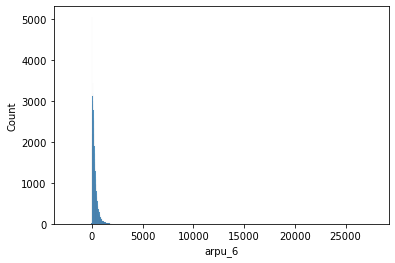

In [45]:
#Plot the average revenue per user in June "univariate".churn = sns.churn('arpu_6')
sns.histplot(data = churn, x = 'arpu_6')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

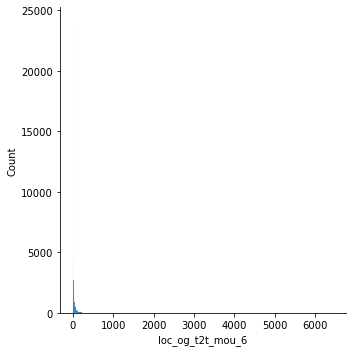

In [46]:
#Plot the minutes of usage of local(within same telecom circle) outgoing calls per OperatorT to other operator fixed line "univariate".
sns.displot(data = churn, x = 'loc_og_t2t_mou_6')
plt.show

<AxesSubplot:xlabel='std_og_t2o_mou', ylabel='count'>

<function matplotlib.pyplot.show(close=None, block=None)>

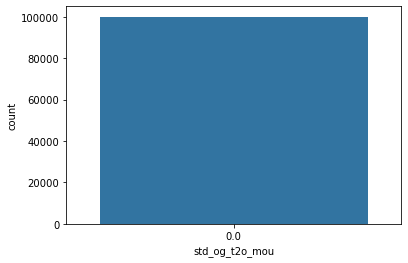

In [47]:
#Plot the minutes of usage STD(outside of the calling circle)  outgoing calls of Operator T to other opertor fixed line "univariate"
sns.countplot(data = churn, x = 'std_og_t2o_mou')
plt.show

<AxesSubplot:xlabel='onnet_mou_8', ylabel='count'>

<function matplotlib.pyplot.show(close=None, block=None)>

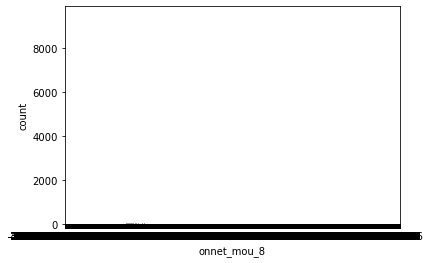

In [48]:
#Plot the minutes of usage of all kind of calls with the same operator network for the month of August "univariate".
sns.countplot(data = churn, x = 'onnet_mou_8')
plt.show

<AxesSubplot:xlabel='churned', ylabel='aon'>

<function matplotlib.pyplot.show(close=None, block=None)>

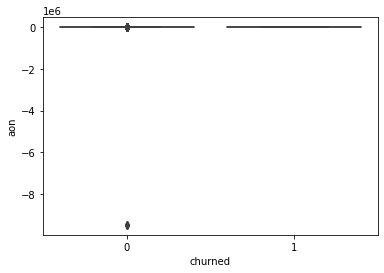

In [49]:
#Plot the relationship between whether the customer churned or not and the age on network(number of days the customer is using the operator T network) "bivariate"
sns.boxplot(data = churn, x = 'churned', y ='aon' )
plt.show

<AxesSubplot:xlabel='churned', ylabel='sep_vbc_3g'>

<function matplotlib.pyplot.show(close=None, block=None)>

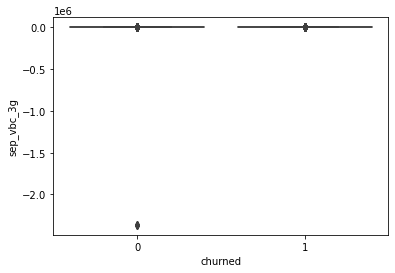

In [50]:
#Plot the relationship between the 3G volume based cost in Sept(when no specific scheme is not purchased and paid as per usage) and whether the customer churned or not "bivariate".
sns.boxplot(data = churn, x = 'churned', y = 'sep_vbc_3g')
plt.show

col_0,churned
col_1,sachet_3g_8
rownames,
churned,1


<AxesSubplot:>

<function matplotlib.pyplot.show(close=None, block=None)>

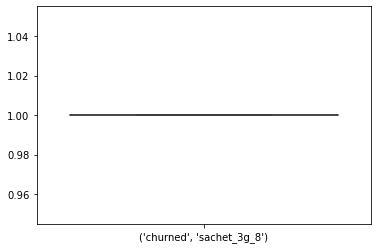

In [51]:
#Plot the relationship between whether the customer churned or not and the night package used by users in August "pd.crosstab" normalize = columns
index = np.array(['churned'])
rownames = np.array(['churned'])
column = np.array(['sachet_3g_8'])

churned_1 = pd.crosstab(index, [rownames, column], rownames = ['rownames'])
churned_1

sns.boxplot(data = churned_1)
plt.show

col_0,churned
col_1,sachet_3g_8
rownames,
churned,1


<AxesSubplot:>

<function matplotlib.pyplot.show(close=None, block=None)>

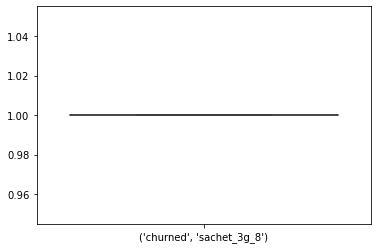

In [52]:
#Plot the relationship between whether the customer churned or not and the 3G service schemes with validity smaller than a month for the month of August "pd.crosstab"
index = np.array(['churned'])
rownames = np.array(['churned'])
column = np.array(['sachet_3g_8'])

churned_2 = pd.crosstab(index, [rownames, column], rownames = ['rownames'])
churned_2

sns.boxplot(data = churned_2)
plt.show

In [53]:
churn['churned'] = churn['churned'].astype(float)
churn.dtypes


std_og_t2o_mou           float64
loc_ic_t2o_mou           float64
arpu_6                   float64
arpu_7                   float64
arpu_8                   float64
onnet_mou_6              float64
onnet_mou_7              float64
onnet_mou_8              float64
offnet_mou_6             float64
offnet_mou_7             float64
offnet_mou_8             float64
roam_ic_mou_6            float64
roam_ic_mou_7            float64
roam_ic_mou_8            float64
roam_og_mou_6            float64
roam_og_mou_7            float64
roam_og_mou_8            float64
loc_og_t2t_mou_6         float64
loc_og_t2t_mou_7         float64
loc_og_t2t_mou_8         float64
loc_og_t2m_mou_6         float64
loc_og_t2m_mou_7         float64
loc_og_t2m_mou_8         float64
loc_og_t2f_mou_6         float64
loc_og_t2f_mou_7         float64
loc_og_t2f_mou_8         float64
loc_og_t2c_mou_6         float64
loc_og_t2c_mou_7         float64
loc_og_t2c_mou_8         float64
loc_og_mou_6             float64
loc_og_mou

In [54]:
###Cap Outliers in all numeric variables
#Function for capping outliers
def cap_outliers(churn):
    Q3 = np.quantile(churn, 0.25)
    Q1 = np.quantile(churn, 0.75)
    IQR = Q3-Q1

#Get the 75% quartile of the array 
#Get the 25% quartlies of the array
churn.quantile(q=[0.25,0.75], axis = 0, numeric_only=True)

#Get the interquartile range (IQR (q3-q1))
Q3, Q1 = np.quantile(churn,[0.75,0.25])
IQR = Q3-Q1

#Calculate the upper limit - 75% quartile + 1.5 * IRQ
upper_limit = Q1 + 1.5 *IQR
#Calculate the lowerlimit - 25% quartile - 1.5 *IQR
lower_limit = Q3 - 1.5 *IQR
#Perform outlier capping

        
#Set all the values in the array above the upper limit to be equal to the upper limit.

#Set all the values in the array below the lower limit to be equal to the lower limit.

#Example of capping
#add outliers to the data

#cap outliers 
print("Shape after capping outliers is:", churn.shape)


#Cap ouliers in all the numeric columns using your outlier capping function

,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,total_rech_amount_6,total_rech_amount_7,total_rech_amount_8,comb_rech_amt_6,total_data_rech_amt_7,comb_rech_amt_7,churned,revenue_6,revenue_7,revenue_8,revenue_6_7,usage
0.25,0.0,0.0,93.41375,86.9915,84.13200,5.43,7.28,4.08,28.755,33.975,34.5100,0.0,0.0,0.0,0.0,0.0,0.0,1.91000,1.86,1.95,10.760,10.890,11.16,0.00,0.00,0.00,0.0,0.0,0.0,12.93,13.46,11.4250,0.00,0.00,0.00,0.000,0.000,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0000,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,44.730,43.010,38.5800,3.33000,3.540000,3.740000,18.56,19.73,20.69,0.00,0.00,0.00,32.44,34.46,35.4900,0.00,0.000,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.11,0.0800,0.20,38.51,41.175,38.2900,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,3.0,3.0,3.0,109.0,100.0,90.0,30.0,30.0,30.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,467.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,110.0,0.0,100.0,0.0,282.987133,278.536499,279.154679,-4.450634,-37.345451
0.75,0.0,0.0,371.04875,365.3245,369.36525,112.61,139.21,106.74,222.530,256.380,273.1825,0.0,0.0,0.0,0.0,0.0,0.0,40.65288,37.91,37.36,105.765,103.345,102.96,2.83,2.81,3.11,0.0,0.0,0.0,161.91,157.96,157.0325,45.59,46.48,53.83,70.545,71.565,79.49,0.0,0.0,0.0,0.0,0.0,0.0,132.56,136.9325,129.39,0.0,0.0,0.0,2.18,3.38,3.54,0.0,0.0,0.0,372.845,378.545,369.8825,52.90666,46.532863,47.175505,127.61,126.68,127.23,10.33,10.48,11.23,200.61,198.69,197.5325,5.61,5.815,6.49,18.54,19.29,20.81,0.0,0.0,0.2,0.0,0.0,0.0,25.43,26.6325,25.51,251.66,250.645,248.9825,0.0,0.0,0.0,0.0,0.0,0.0,0.05,0.0,0.09,9.0,10.0,9.0,437.0,428.0,434.0,120.0,128.0,144.0,110.0,110.0,130.0,1.0,1.0,1.0,8.0,14.0,17.0,23.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1807.0,0.0,0.0,0.0,0.0,13.0,17.0,23.0,439.0,98.0,430.0,0.0,282.987133,278.536499,279.154679,-4.450634,34.334549


Shape after capping outliers is: (100004, 152)


In [84]:
#Task 6: Modeling
#Importing necessary libraries for machine learning and deep learning.
!pip install imblearn
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
#basline linear model
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
#modules for hyperperameter tuning
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, accuracy_score, f1_score, r2_score
from sklearn.metrics import precision_score, recall_score, f1_score, r2_score
from sklearn.metrics import precision_recall_curve, roc_curve
#Import methods for building neural networks
import tensorflow as tf
from tensorflow import keras
from keras import layers 
from keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, Dropout
from tensorflow.keras.optimizers import RMSprop
#Import 'KerasClassifer' from 'keras' for connecting neural networks with 'sklearn' and 'GridSearchCV'
from keras.wrappers.scikit_learn import KerasClassifier


In [163]:
###Train Test split

#Extract input and output data
y = churn['churned']
x = churn.iloc[:,:]
#Use dummy variables for categorical variables

x = pd.get_dummies(x, drop_first = True)

#Divide data into train and test
#Note: Set the random_state parameter to '4'
#Note: Set the 'test_size' parameter to '.25'
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.25, random_state = 4)
#Print shapes of train and test sets
x_train.shape
y_train.shape
x_test.shape
y_test.shape

x_new = x.to_numpy()

print('')

#train-test split using Stratified K-fold
skf = StratifiedKFold(n_splits=2)
skf.get_n_splits(x_new,y)
for train_index, test_index in skf.split(x_new,y):
    x_train, x_test = x_new[train_index], x_new[test_index]
    y_train, y_test = y[train_index],y[test_index]

y_train.value_counts()


(75003, 152)

(75003,)

(25001, 152)

(25001,)

2

0.0    46870
1.0     3132
Name: churned, dtype: int64

In [86]:
#Observe that the dataset is imbalanced. You should get the number of entries with output '0'.This means that if we run a simple machine learning model, it should already show 90% accuracy.
#But in this case study, it is the most important for the model to predict which customer will churn as this will decide how their business is performing.
#We have to create a modl that will predic the output '1' accurately. Bit its corresponding number of entries are very less.
#Hense we will be doing some sampling methods to make the data set balanced.
#**Random Under Sampling**: This method basically consists of removing data in order to have a more balanced data set and thus avoiding our models to ovefitting.
#WE hae seen how imbalanced the data set is. With random under-sampling, we have a sub-sample of our datafram with a 50/50 ratio with regards to our classes.
#This measn that if there are 1221 '0' class data entries, then there will be 1221 '1' class data entries by removing the rest.

#Note: The main issue with "Random Under-Sampling" is that we run the risk that our classification models will not perform as accuate as would like to since there is a great deal of inforamtion loss.


In [87]:
#Random under sampling using imblearn.
#Use the RandomUnderSampler (RUS) function to produce new x and y from x_train and y_train.
#Use random_state as 1 for reproducability

rus = RandomUnderSampler(random_state =1)
x_rus, y_rus = (x_train,y_train)
rus.fit(x_train,y_train)

y_rus.value_counts()

#Test Split
x_train_rus, x_test_rus, y_train_rus, y_test_rus = train_test_split(x_rus, y_rus, test_size = 0.3, random_state = 42, stratify = y_rus)
y_train_rus.value_counts()

#**Random Over-Sampling**: This method basically consists of adding data in order to have a more balance dataset and thus avoiding our models to overfitting.
#We have seen how imbalanced the data set is. With random over-sampling, we have a sub sample of our datafram with a  50/50 ratio with regards to our classes.
#This means that if there are 13780 '1' class data entries, then there will be 13780 '0' class data entries removing the rest.


#Use the RandomOverSampler (ROS) function to produce new x and y from x_train and y_train
#Use random_state as 1 for reproducibility.

ros = RandomOverSampler(random_state =1)
x_ros, y_ros = (x_train,y_train)
ros.fit(x_train,y_train)

#Test Split
x_train_ros, x_test_ros, y_train_ros, y_test_ros = train_test_split(x_ros, y_ros,test_size = 0.2, stratify = y_ros, random_state = 42)
y_train.value_counts()

x_train_rus, x_test_rus, y_train_rus, y_test_rus = train_test_split(x_rus, y_rus, test_size = 0.3, random_state = 42, stratify = y_rus)
y_train_rus.value_counts()



RandomUnderSampler(random_state=1)

0.0    46870
1.0     3132
Name: churned, dtype: int64

0.0    32809
1.0     2192
Name: churned, dtype: int64

RandomOverSampler(random_state=1)

0.0    46870
1.0     3132
Name: churned, dtype: int64

0.0    32809
1.0     2192
Name: churned, dtype: int64

In [101]:
#Now test different machine learning models over the three data sets, namely, the original cleaned data set, the under-sampled data set and the over-sampled data set.
##Logistic Regression##
#Define the logistic regression model and fit it on the normal x_train and y_train
#Penalty is set to 'none'
#Solver is set to 'lbfgs'
#Random_state is set to 0
#Max_Iter is set to 100

#You can change these values or use GridSearchCV to perform hyperparameter tuning to find the optimal performing model.
model_name = 'LogisticRegression without balancing'

lr = LogisticRegression(penalty = 'none', solver = 'lbfgs', random_state = 0, max_iter = 100)
lr.fit(x_train, y_train)

#Evaluating the accuracy of the training and validation sets

log_train_acc = (x_train,y_train)
log_val_acc = (x_test,y_test)
x_test = []
y_pred = []


#Calculate the F1 score, Precision and Recall on the validation set
f1 = f1_score(x_test,y_pred)
precision = precision_score(x_test,y_pred)
recall = recall_score(x_test,y_pred)

print('Valdation data F1 Score: %.3f' % f1_score(x_test,y_pred))
print('Valdation data Precision Score: %.3f' % precision_score(x_test,y_pred))
print('Valdation data Recall Score: %.3f' % recall_score(x_test,y_pred))



LogisticRegression(penalty='none', random_state=0)

Valdation data F1 Score: 0.000
Valdation data Precision Score: 0.000
Valdation data Recall Score: 0.000


In [ ]:
#Creating a dataframe to compare the performance of difference f1_score, precision, recall.
model_eval_data = [[model_name, log_train_acc, log_val_acc, f1_score, precision, recall]]

evaluate_df = pd.DataFrame(model_eval_data, columns = ['Model Name','Training Score', 'Testing Score', 'F1 Score','Precision','Recall'])

plt.plot(evaluate_df['Model Name'])
plt.plot(evaluate_df['Training Score'])
plt.plot(evaluate_df['Testing Score'])
plt.plot(evaluate_df['F1 Score'])
plt.plot(evaluate_df['Precision'])
plt.plot(evaluate_df['Recall'])


In [120]:
#Defining the Logisitic Regression Model and fit it on the random under sampled x_train_rus and y_train_rus.
#Penalty is set to 'none'
#Solver is set to 'lbfgs'
#random_state is set to 1
#max_iter is set to 0

model_name = 'Logistic Regression - Random Undersampling'

lr_rus = LogisticRegression(penalty = 'none', solver = 'lbfgs', random_state = 0, max_iter = 100)
lr_rus.fit(x_train_rus, y_train_rus)

#Evaluating the accuracy of the training and validation sets

log_train_acc = (x_train_rus,y_train_rus)
log_val_acc = (x_test,y_test)
x_test_rus = []
y_pred_rus = []


#Calculate the F1 Score, Precision and Recall on the valdiation set
f1 = f1_score(x_test_rus,y_pred_rus)
accuracy = precision_score(x_test_rus,y_pred_rus)
precision = recall_score(x_test_rus,y_pred_rus)

print('Valdation data F1 Score: %.3f' % f1_score(x_test_rus,y_pred_rus))
print('Valdation data Precision Score: %.3f' % precision_score(x_test_rus,y_pred_rus))
print('Valdation data Recall Score: %.3f' % recall_score(x_test_rus,y_pred_rus))

#Adding calculations to dataframe
model_eval_data = [model_name, log_train_acc, log_val_acc, f1_score, precision, recall]

model_eval_dict = {evaluate_df.columns[i]: model_eval_data[i] for i in range(len(model_eval_data))}

evaluate_df = evaluate_df.append(model_eval_dict, ignore_index=True)

LogisticRegression(penalty='none', random_state=0)

Valdation data F1 Score: 0.000
Valdation data Precision Score: 0.000
Valdation data Recall Score: 0.000


In [161]:
#Defining the logistic Regession model and fit it on the random over sampled x_train_ros and y_train_ros.
#Penalty is set to 'none'
#solver is set to 'lbfgs'
#random_state is set to '0'
#max_iter is set to 100



model_name = 'LogisticRegression - Random Oversampling'

lr_ros = LogisticRegression(penalty = 'none', solver = 'lbfgs', random_state = 0, max_iter = 100)
lr_ros.fit(x_train_ros, y_train_ros)


#Evaluating the accuacy of the training and valdiation sets
log_train_acc = (x_train_ros,y_pred_ros)
log_test_acc = (x_test_ros,y_pred_ros)
x_test_ros = []
y_pred_ros = []


#Calculate the F1 Score, Precision and Recall on the valdiation set
f1 = f1_score(x_test_ros,y_pred_ros)
accuracy = precision_score(x_test_ros,y_pred_ros)
precision = recall_score(x_test_ros,y_pred_ros)

print('Valdation data F1 Score: %.3f' % f1_score(x_test_ros,y_pred_ros))
print('Valdation data Precision Score: %.3f' % precision_score(x_test_ros,y_pred_ros))
print('Valdation data Recall Score: %.3f' % recall_score(x_test_ros,y_pred_ros))

#Adding calculations to dataframe

model_eval_data = [model_name, log_train_acc, log_test_acc, f1_score, precision, recall]

model_eval_dict = {evaluate_df.columns[i]: model_eval_data[i] for i in range(len(model_eval_data))}

evaluate_df = evaluate_df.append(model_eval_dict, ignore_index=True)

LogisticRegression(penalty='none', random_state=0)

Valdation data F1 Score: 0.000
Valdation data Precision Score: 0.000
Valdation data Recall Score: 0.000


In [145]:
#Decision Tree
#Defining the Decision Tree model and fit it on the normal x_train and y_train
#'max_depth' is set to 50
#'random_state' is set to 0

model_name = 'Decision Tree - without balancing'

tree = DecisionTreeClassifier (max_depth = 50, random_state = 0)

tree.fit(x_train,y_train)

#You can change these values or use GridSearchCV to perform hyperparameter tuning to find the optimal balancing

#Evaluating the accuracy of the training and validation sets

tree_train_acc = (x_train,y_pred)
tree_test_acc= (x_train,y_pred)
x_test = []
y_pred = []


#Calculate the F1 score, Precision and Recall on the validation set
f1 = f1_score(x_test, y_pred)
recall = recall_score(x_test, y_pred)
precision = precision_score(x_test, y_pred)

print('Valdation data F1 Score: %3f' % f1_score(x_test, y_pred))
print('Valdation data Recall Score: %3f' % recall_score(x_test, y_pred))
print('Valdation data Precision Score: %3f' % precision_score( x_test, y_pred))

#adding calculations to the tree_val_acc, f_score, precision, recall

model_eval_data = [model_name, tree_train_acc, tree_test_acc, f1_score, precision, recall]

model_eval_dict = {evaluate_df.columns[i]: model_eval_data[i] for i in range(len(model_eval_data))}

evaluate_df = evaluate_df.append(model_eval_dict, ignore_index=True)

##Decision Tree - Random UnderSampling
#Defining the decision tree model and fit it on the random undersampled x_train_rus and y_train_rus
#'max_depth' is set to 50
#'random_state' is set to 0

tree_rus = DecisionTreeClassifier (max_depth = 50, random_state = 0)
tree_rus.fit(x_train_rus,y_train_rus)

model_name = 'Decision Tree - Random Undersampling'

#Evaluating the accuracy of the training and validation sets
tree_train_acc = (x_train,y_pred)
tree_test_acc = (x_test,y_pred)
x_test_rus = []
y_pred_rus = []

#Calculate the F1 score, Precision and Recall on the validation set
f1 = f1_score(x_test_rus, y_pred_rus)
recall = recall_score(x_test_rus, y_pred_rus)
precision = precision_score(x_test_rus, y_pred_rus)

print('Valdation data F1 Score: %.3f' % f1_score(x_test_rus, y_pred_rus))
print('Valdation data Recall Score: %.3f' % recall_score(x_test_rus, y_pred_rus))
print('Valdation data Precision Score: %.3f' % precision_score(x_test_rus, y_pred_rus))

#adding calculations to dataframe
model_eval_data = [model_name, tree_train_acc, tree_test_acc, f1_score, precision, recall]

model_eval_dict = {evaluate_df.columns[i]: model_eval_data[i] for i in range(len(model_eval_data))}

evaluate_df = evaluate_df.append(model_eval_dict, ignore_index=True)

#Defining the decision tree model and fit in on the random oversampled x_train_ros and y_train_ros
#'max_depth' is set to 50

#'random_state' is set to 0

tree_rus = DecisionTreeClassifier (max_depth = 50, random_state = 0)
tree_rus.fit(x_train_ros,y_train_ros)

model_name = 'Decision Tree - Random Oversampling'
#Evaluating the accuracy of the training and validation sets
tree_train_acc = (x_train_ros,y_pred_ros)
tree_test_acc = (x_test_ros,y_pred_ros)
x_test_ros = []
y_pred_ros = []

#Calculate the F1 score, Precision and Recall on the validation set
f1 = f1_score(x_test_ros, y_pred_ros)
recall = recall_score(x_test_ros, y_pred_ros)
precision = precision_score(x_test_ros, y_pred_ros)

print('Valdation data F1 Score: %.3f' % f1_score(x_test_ros, y_pred_ros))
print('Valdation data Recall Score: %.3f' % recall_score(x_test_ros, y_pred_ros))
print('Valdation data Precision Score: %.3f' % precision_score(x_test_ros, y_pred_ros))

#adding calculations to dataframe
model_eval_data = [model_name, tree_train_acc, tree_test_acc, f1_score, precision, recall]

model_eval_dict = {evaluate_df.columns[i]: model_eval_data[i] for i in range(len(model_eval_data))}

evaluate_df = evaluate_df.append(model_eval_dict, ignore_index=True)


DecisionTreeClassifier(max_depth=50, random_state=0)

Valdation data F1 Score: 0.000000
Valdation data Recall Score: 0.000000
Valdation data Precision Score: 0.000000


DecisionTreeClassifier(max_depth=50, random_state=0)

Valdation data F1 Score: 0.000
Valdation data Recall Score: 0.000
Valdation data Precision Score: 0.000


DecisionTreeClassifier(max_depth=50, random_state=0)

Valdation data F1 Score: 0.000
Valdation data Recall Score: 0.000
Valdation data Precision Score: 0.000


In [159]:
#Defining the KNN model and fit on the normal x_train and y_train
#'n_neigbors' is set to 14


#You can change these value or use GridSearchCV to perform hyperparameter tuning to find the optimal performing model
model_name = 'kNN - without balancing'

knn = KNeighborsClassifier(n_neighbors = 14)
knn.fit(x_train, y_train)

#Evaluating the accuracy of the training and valdation sets
knn_train_acc = (x_train,y_pred)
knn_test_acc= (x_train,y_pred)
x_test = []
y_pred = []

#Calculate the F1 score, Precision and Recall on the validation set
f1 = f1_score(x_test, y_pred)
precision = precision_score(x_test, y_pred)
recall = recall_score(x_test, y_pred)

print('Validation data F1 Score: %.3f' % f1_score(x_test, y_pred))
print('Validation data Precision: %.3f' % precision_score(x_test, y_pred))
print('Validation data Recall: %.3f' % recall_score(x_test, y_pred))

#adding calculations to the tree_val_acc, f_score, precision, recall

model_eval_data = [model_name, knn_train_acc, knn_test_acc, f1_score, precision, recall]

model_eval_dict = {evaluate_df.columns[i]: model_eval_data[i] for i in range(len(model_eval_data))}

evaluate_df = evaluate_df.append(model_eval_dict, ignore_index=True)

#Defining the KNN model and fit it on the random undersampled x_train_rus and y_train_rus
#'max_depth' is set to 50
#'random_state' is set to 0


model_name = 'kNN - Random Undersampling'

knn_rus = KNeighborsClassifier(n_neighbors = 14)
knn_rus.fit(x_train_rus, y_train_rus)

#Evaluating the accuracy of the training and validation sets
knn_train_acc = (x_train,y_pred)
knn_test_acc = (x_test,y_pred)
x_test_rus = []
y_pred_rus = []

#Calculate the F1 score, Precision and Recall on the validation set
f1 = f1_score(x_test_rus, y_pred_rus)
recall = recall_score(x_test_rus, y_pred_rus)
precision = precision_score(x_test_rus, y_pred_rus)

print('Valdation data F1 Score: %.3f' % f1_score(x_test_rus, y_pred_rus))
print('Valdation data Recall Score: %.3f' % recall_score(x_test_rus, y_pred_rus))
print('Valdation data Precision Score: %.3f' % precision_score(x_test_rus, y_pred_rus))


#adding calculations to dataframe
model_eval_data = [model_name, knn_train_acc, knn_test_acc, f1_score, precision, recall]

model_eval_dict = {evaluate_df.columns[i]: model_eval_data[i] for i in range(len(model_eval_data))}

evaluate_df = evaluate_df.append(model_eval_dict, ignore_index=True)

#Defining the dcision tree model and fit in on the random oversampled x_train_ros and y_train_ros
#'max_depth' is set to 50
#'random_state' is set to 0

knn_rus = KNeighborsClassifier(n_neighbors = 14)
knn_rus.fit(x_train_ros, y_train_ros)

#Evaluating the accuracy of the training and validation sets
knn_train_acc = (x_train,y_pred)
knn_test_acc = (x_test,y_pred)
x_test_ros = []
y_pred_ros = []

#Calculate the F1 score, Precision and Recall on the validation set
f1 = f1_score(x_test_ros, y_pred_ros)
recall = recall_score(x_test_ros, y_pred_ros)
precision = precision_score(x_test_ros, y_pred_ros)

#Calculate the F1 score, Precision and Recall on the validation set
print('Validation data F1 Score: %.3f' % f1_score(x_test_ros, y_pred_ros))
print('Validation data Recall: %.3f' % recall_score(x_test_ros, y_pred_ros))
print('Validation data Precision: %.3f' % precision_score(x_test_ros, y_pred_ros))

#adding calculations to dataframe

model_eval_data = [model_name, rf_train_acc, rf_test_acc, f1_score, precision, recall]

model_eval_dict = {evaluate_df.columns[i]: model_eval_data[i] for i in range(len(model_eval_data))}

evaluate_df = evaluate_df.append(model_eval_dict, ignore_index=True)


KNeighborsClassifier(n_neighbors=14)

Validation data F1 Score: 0.000
Validation data Precision: 0.000
Validation data Recall: 0.000


KNeighborsClassifier(n_neighbors=14)

Valdation data F1 Score: 0.000
Valdation data Recall Score: 0.000
Valdation data Precision Score: 0.000


KNeighborsClassifier(n_neighbors=14)

Validation data F1 Score: 0.000
Validation data Recall: 0.000
Validation data Precision: 0.000


In [157]:
#Defining the Random Forest Classifier Model and fit it on the normal x_train_and y_train
#'n_estimators' is set to 200
#'max_depth' is set to 5
#'class weight' is set to 'balanced'
#'random_state' is set to 123

#You can change these value or use GridSearchCV to perform hyperparameter tuning to find the optimal performing model 
model_name = 'Random Forest - without balancing'

rf = RandomForestClassifier(n_estimators = 5, max_depth = 5, class_weight = 'balanced', random_state = 123)
rf.fit(x_train, y_train) 

#Evaluating the accuracy of the training and validation sets
rf_train_acc = (x_train,y_pred)
rf_test_acc= (x_train,y_pred)
x_test = []
y_pred = []

#Calculate the F1 score, Precision and Recall on the validation set
f1 = f1_score(x_test, y_pred)
recall = recall_score(x_test, y_pred)
precision = precision_score(x_test, y_pred)

print('Valdation data F1 Score: %3f' % f1_score(x_test, y_pred))
print('Valdation data Recall Score: %3f' % recall_score(x_test, y_pred))
print('Valdation data Precision Score: %3f' % precision_score( x_test, y_pred))


#adding calculations to dataframe
model_eval_data = [model_name, rf_train_acc, rf_test_acc, f1_score, precision, recall]

model_eval_dict = {evaluate_df.columns[i]: model_eval_data[i] for i in range(len(model_eval_data))}

evaluate_df = evaluate_df.append(model_eval_dict, ignore_index=True)

##Random Forest
#Defining the Random Forest Classifier and fit it on the under sampled x_train_rus and y_train_rus
#'n_estimators' is set to 200
#'max_depth' is set to 5
#'class weight' is set to 'balanced'
#'random_state' is set to 123

model_name = 'Random Forest - Random Undersampling'

rf_rus = RandomForestClassifier(n_estimators = 5, max_depth = 5, class_weight = 'balanced', random_state = 123)
rf_rus.fit(x_train, y_train) 


#Evaluating the accuracy of the training and validation sets
rf_train_acc = (x_train_rus,y_pred_rus)
rf_test_acc = (x_test_rus,y_pred_rus)
x_test_rus = []
y_pred_rus = []

#Calculate the F1 score, Precision and Recall on the validation set
f1 = f1_score(x_test_rus, y_pred_rus)
recall = recall_score(x_test_rus, y_pred_rus)
precision = precision_score(x_test_rus, y_pred_rus)
print('Validation data F1 Score: %.3f' % f1_score(x_test_rus, y_pred_rus))
print('Validation data Recall : %.3f' % recall_score(x_test_rus, y_pred_rus))
print('Validation data Precision: %.3f' % precision_score(x_test_rus, y_pred_rus))


#adding calculations to dataframe
model_eval_data = [model_name, rf_train_acc, rf_test_acc, f1_score, precision, recall]

model_eval_dict = {evaluate_df.columns[i]: model_eval_data[i] for i in range(len(model_eval_data))}

evaluate_df = evaluate_df.append(model_eval_dict, ignore_index=True)

#Defining the Random Forest Classifier model and fit in onthe random oversampled x_train_ros and y_train_ros
#'n_estimators' is set to 200
#'max_depth' is set to 5
#'class weight' is set to 'balanced'
#'random_state' is set to 123

model_name = 'Random Forest - Random Oversampling'

rf_ros = RandomForestClassifier(n_estimators = 5, max_depth = 5, class_weight = 'balanced', random_state = 123)
rf_ros.fit(x_train_ros, y_train_ros)

#Evaluating the accuracy of the training and validation sets
rf_train_acc = (x_train_ros,y_pred_ros)
rf_test_acc = (x_test_ros,y_pred_ros)
x_test_ros = []
y_pred_ros = []

#Calculate the F1 score, Precision and Recall on the validation set
f1 = f1_score(x_test_ros, y_pred_ros)
accuracy = accuracy_score(x_test_ros, y_pred_ros)
precision = precision_score(x_test_ros, y_pred_ros)

print('Valdation data F1 Score: %.3f' % f1_score(x_test_ros, y_pred_ros))
print('Valdation data Recall Score: %.3f' % recall_score(x_test_ros, y_pred_ros))
print('Valdation data Precision Score: %.3f' % precision_score(x_test_ros, y_pred_ros))

#adding calculations to dataframe
model_eval_data = [model_name, rf_train_acc, rf_test_acc, f1_score, precision, recall]

model_eval_dict = {evaluate_df.columns[i]: model_eval_data[i] for i in range(len(model_eval_data))}

evaluate_df = evaluate_df.append(model_eval_dict, ignore_index=True)

RandomForestClassifier(class_weight='balanced', max_depth=5, n_estimators=5,
                       random_state=123)

Valdation data F1 Score: 0.000000
Valdation data Recall Score: 0.000000
Valdation data Precision Score: 0.000000


RandomForestClassifier(class_weight='balanced', max_depth=5, n_estimators=5,
                       random_state=123)

Validation data F1 Score: 0.000
Validation data Recall : 0.000
Validation data Precision: 0.000


RandomForestClassifier(class_weight='balanced', max_depth=5, n_estimators=5,
                       random_state=123)

Valdation data F1 Score: 0.000
Valdation data Recall Score: 0.000
Valdation data Precision Score: 0.000


In [158]:
#In this case study, the most important factor in the prediction performance of a machine leaning model is that is should be able to predict the positive classe as accurately as possible.
#This means that the false negaiteve and false positives are supposed to be as minimal as possible. This further means that precision and recall should be as high as possibel.
#There is another factor to consider. The mose important factor which can leand to a company loss is the false negatives. 
#This is because if we predict that a customer did not churn but in reality, the customer did, the company will miss out on the data of churned customers.
#Hence, observing the recall factor is much more important than precision.

In [252]:
#Chose the model that performs in a robust manner with good accuracy, precision and recall. Especially look out for the recall value because a good recall value means that it is able to accurately classify the data example of the customers who churned.
#Define your model and parameter grid.
#Make sure to use your random_state value as 0.
model_name = 'Random Forest - without balancing'

rf = RandomForestClassifier(n_estimators = 5, max_depth = 5, class_weight = 'balanced', random_state = 0)
rf.fit(x_train, y_train) 

#Evaluating the accuracy of the training and validation sets
rf_train_acc = (x_train,y_pred)
rf_test_acc= (x_train,y_pred)
x_test = []
y_pred = []

#Calculate the F1 score, Precision and Recall on the validation set
f1 = f1_score(x_test, y_pred)
recall = recall_score(x_test, y_pred)
precision = precision_score(x_test, y_pred)

print('Valdation data F1 Score: %3f' % f1_score(x_test, y_pred))
print('Valdation data Recall Score: %3f' % recall_score(x_test, y_pred))
print('Valdation data Precision Score: %3f' % precision_score( x_test, y_pred))


#Perform GridSearchCV
rf_clf = RandomForestClassifier(random_state = 0, max_depth = 20)
rf_clf.fit(x_test,y_pred)


RandomForestClassifier(class_weight='balanced', max_depth=5, n_estimators=5,
                       random_state=0)

Valdation data F1 Score: 0.000000
Valdation data Recall Score: 0.000000
Valdation data Precision Score: 0.000000


ValueError: Expected 2D array, got 1D array instead:
array=[].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [ ]:
#Re-fit your model with the combination of parameters obtainded from GridSearchCV

#Make sure to use random_state value as 0.
rf_clf = RandomForestClassifier(random_state = 0)
rf_clf.fit(x_train,y_train)

#Evaluate the accuracy of the training and validation sets.

rf_train_acc = (x_train,y_pred)
rf_test_acc= (x_train,y_pred)
x_test = []
y_pred = []

#Find the importance of all the features according to the optimal model defined above

#Create a datafram with the feature importance in decending order so that the highest importance are shown at the start of the dataframe.

#Display the data frame obtained
churn_modified = 
#Evaluating the model on the training and validation set using accuracy, confusion metrics and AUC of ROC
###CODE HERE###


0         0.0
1         0.0
2         0.0
3         0.0
4         0.0
         ... 
99999     0.0
100000    0.0
100001    0.0
100002    0.0
100003    0.0
Name: churned, Length: 100004, dtype: float64

Epoch 1/20
1563/1563 [==============================] - 17s 6ms/step - loss: 0.2440 - accuracy: 0.9369
Epoch 2/20
1563/1563 [==============================] - 10s 7ms/step - loss: 0.2433 - accuracy: 0.9374
Epoch 3/20
1563/1563 [==============================] - 11s 7ms/step - loss: 0.2435 - accuracy: 0.9374
Epoch 4/20
1563/1563 [==============================] - 10s 6ms/step - loss: 0.2437 - accuracy: 0.9374
Epoch 5/20
1563/1563 [==============================] - 9s 5ms/step - loss: 0.2445 - accuracy: 0.9374
Epoch 6/20
1563/1563 [==============================] - 9s 5ms/step - loss: 0.2445 - accuracy: 0.9374
Epoch 7/20
1563/1563 [==============================] - 9s 6ms/step - loss: 0.2441 - accuracy: 0.9374
Epoch 8/20
1563/1563 [==============================] - 9s 5ms/step - loss: 0.2435 - accuracy: 0.9374
Epoch 9/20
1563/1563 [==============================] - 9s 5ms/step - loss: 0.2439 - accuracy: 0.9374
Epoch 10/20
1563/1563 [==============================] - 8s 5ms/step - loss: 0

<Figure size 1008x288 with 0 Axes>

<AxesSubplot:xlabel='epoch', ylabel='accuracy'>

ValueError: Could not interpret value `test_accuracy` for parameter `y`

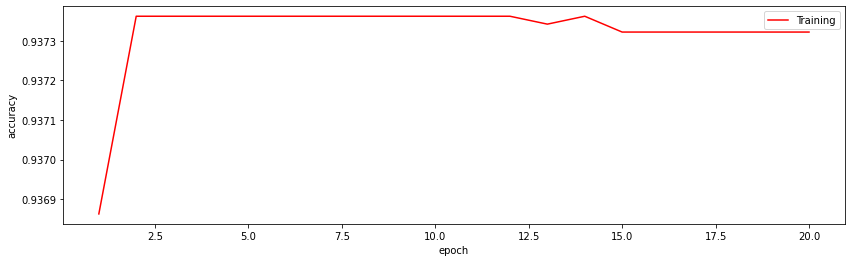

In [250]:
#Neural Networks
#Define a function to create a neural_network model and specify default values for vairable hyperparameters
#Note: The number of hidden layers is fixed at 64
#Note: The output later activation function is fixed at 'sigmoid'
#You can change the hyperparameters mentioned as arguments in the create_nn function.
#So that you can use them in GridSearchCV hyperparameter tuning
#Feel free to modify the model too and test the model performance
#You can add more types of laer like Dropout, Batch normalization etc
#Note: The variable hyperparameter list is the activation functions of the hidden layers and  number of neurons in the first hiddent layer

#Declare an instance of an artificial neural network model using the 'Sequential()' method

#keras.Input is the input layer of the neural network nn.
#Add a hidden layer using the 'add()' and 'Dense()' methods
#Note: Set the 'units' parameter to 'hidden1_neurons' - This specifies the number of neurons in the hidden layer
#Note: Set the 'activation' parameter to 'activation_function' - This specities the activation function parameter defined int he custom function nn.

#Add the output layer using the 'add()' and 'Dense()'methods
#Note: Set the 'units' parameter to 1 - Binary classification. #Note: Set the 'activation' parameters to 'sigmoid' - The sigmoid activation function is used for output layer neurons in binary classification tasks nn.

#Compile the model using the 'compile()' method. 
#Note: Set the 'loss' parameter to 'binary_crossentropy' - The binary crossentropy function is commonly used for binary classification tasks.
#Note: Set the 'metrics' parameter to 'accuracy' - This records the accuracy of the model along with the loss during training.
#Note: Set the 'optimizer parameter' to 'RMSprop'and set its 'learning rate' parameter to 'learning_rate_value'. - This specifies the learning rate valued defined in the customer function nn.
learning_rate_value = 0.1 
nn_hist = churn['churned']
nn_hist

def create_nn(n_hidden = 64,
              n_neurons = 10,
              activation_function = 'sigmoid'):
    nn = Sequential()
    nn.add(Dense(units = n_neurons,
             activation = activation_function))
    nn.add(Dense(units = 1,
             activation = 'sigmoid'))
    nn.compile(loss = 'binary_crossentropy',
           metrics = 'accuracy',
           optimizer = RMSprop(learning_rate = learning_rate_value))
    return nn


#Create a default neural network using the 'create_nn' function and train it on the traning data 
nn1 = create_nn()
nn1_hist = nn1.fit(x_train,y_train, epochs = 20)
nn1.summary()
print()

#Capture the training history of the model using the 'fit()' method
#Note: Set the 'validation_data' parameter to (x_test, y_test)
#Note: Set the 'epochs' parameters to 10 - This specifies the scope of loss computations and parameter updates

#Convert the neural network history object into a data frame to view its specifics
hist = pd.DataFrame (nn1_hist.history)
hist['epoch'] = nn1_hist.epoch
hist['epoch'] = hist['epoch'].apply(lambda x:x +1)

#View the training and validation accuracies as functions of epoch
plt.figure(figsize = (14,4))
sns.lineplot(data = hist, x = 'epoch', y = 'accuracy', color = 'red', label = 'Training')
sns.lineplot(data = hist, x = 'epoch', y = 'test_accuracy', color = 'blue', label = 'Validation')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Accuracy as a Function of Epoch')

#Compute the final accuracy of the model on the validation data set using the 'evaluate()' method
peformance_test = nn1.evaluate(x_test, y_test)

print('The loss value of the model on the validation data is {}'.format(peformance_test[0]))
print('The loss value of the model on the validation data is {}'.format(performance_test[1]))


In [264]:
#Initilize a basic NN object using the 'KerasClassifier()' method.
#Note: Set the 'build_fn' parameter to 'create_nn' - This converts the 'create_nn'function to a 'KerasClassifier' object.
base_grid_model = KerasClassifier(build_fn = create_nn)

#Define a list of 'activation_function' and 'hidden1_neurons' parameters and store it ina parameter grid dictionary
parameters_grid = {'activation_function':['relu', 'sigmoid'], 'hidden1_neurons':[256, 512]}
    
#Perform a grid search using the 'GridSearchCV' method to obtain a grid on which to fit the traning data
#Note:Set the 'estimator' parameter to 'base_grid_model' - This specifies the estimator to be used by 'GridSearchCV'
#Note:Set the 'param_grid' parameter to 'parameters_grid' - This specifies the grid of parameters to search of folds on the cross-validation process.
#Note: Set the 'cv' parameter to 2 - This specifies the number of folds in the cross-validation process
#Note: Set the 'verbose' parameter to 4 - This helps show more relavante information during training
#Train the default batch size or set  it to 32
#Note:Set the 'epochs' parameter to 10
#Note: The 'validation_split' parameter isn't particularly required since cross-validation is already in place

grid = GridSearchCV
grid_model = grid.fit(x_train,y_train)
nn= KerasClassifier(estimator = base_grid_model, param_grid = parameters_grid, cv = 2, verbose = 4)
nn.fit(x_train,y_train, batch_size = 32, epochs = 10)

#Print the optimal values of'activation_function' and 'hidden1_neurons'
best_activation_function = grid_model.best_params_['activation_function']
best_hidden1_neurons = grid_model.best_params_['hidden1_neurons']
best_accuracy = grid_model.best_score_

#Print the optimal values of 'activation_function' and 'hidden neurons'
best_activation_function = grid_model.best_score_

print('\\The optimal convolution filter size is',best_activation_function)
print('\\The optimal value of maxpooling filter size is', best_hidden1_neurons)
print('\\The accuracy of the model with these optimal parameters is', best_accuracy)
      


AttributeError: 'numpy.ndarray' object has no attribute 'estimator'

In [263]:
#Retrain the model with the optimal combination of hyperparameters and save its training history.
#Use the 'create_nn' function to create a NN with optimal values of 'filter_size' and 'pool_filter_size'
#Note: Set the 'activation_function' parameter to 'best_activation_funcion'. - This specifies the optimal value for the parameter to 'best_hidden1_neurons'

nn1 = create_nn(filter_size = 10, pool_filter_size = 10)
best_hidden1_neuron = 100
best_activation_function = best_hidden1_neuron
#Capture the training history of the model using the 'fit()' method

#Note: Set the 'validation_data' parameter to(x_val, y_val)
#Note: Use the default batch size or set it to 32
#Note: Set the 'epochs' parameter to 10

nn1_summary()
print()
nn1.fit(validation_data = (x_test, y_test), batch_size = 32, epochs = 10)
hist = pd.DataFrame(nn1_history.history)
hist['epoch'] = nn1_history.epoch

#View the traning and validation accuracies as functions of epoch
plt.figure(figsize = (14,4))
sns.lineplot(data = hist, x = 'epoch', y = 'val_accuracy', color = 'blue', label = 'Validation')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Accuracy as a Function of Epoch')

#Compute the accuracy of the model on the testing data set using the 'evaluate()' method
performance_test = nn1.evaluate(x_test, y_test)
print('The loss value of the model on the test data is {}'.format(performance_test[0]))
print('The loss value of the model on the test data is {}'.format(performance_test[1]))

TypeError: create_nn() got an unexpected keyword argument 'filter_size'

In [265]:
##Business Insights: Misclassification Costs. "Our first step is to understand the current profitability of the telecommunication service program, and then is to estimate the impact of our model.
#We are going to use misclassification costs to study the impact. We are going to use $500 as an approximation company loss for the false negative cost, and #300
#company loss for the false positive cost"
#Note: We are interested in finding the best cut-off that will maximize the benefit of our machine learning model

#Define the false positve and the false negative misclassiication cost here
fn_cost = 500
fp_cost = 300

#### We will use the optimal model and its corresponding data set that was impement in the GridSearchCV section. Let's first see the performance metrics of the trained model.

#Use the most optimal machine learning model that you obtained from the GridSearchCV section and the corresponding data set you used(norma, RUS or ROS)
###CODE HERE###

#Create a dataframe to compare the performance of different models
new_model_eval_data = [[model_name, train_acc, val_acc, f_score, precision, recall]]

new_evaluate_df = pd.DataFrame(new_mode_eval_data, columns = ['Model Name', 'Training','F1_Score','Precision','Recall'])

#### We now calculate the current misclassification cost in teh validation set.

#Obtain the count of false positive and false negative classifications from your model.

###CODE HERE###

#Calculate the total misclassification cost using the FN and FP cost and FN and FP count
###CODE HERE###

print('Number of False Positives: %d' % fp_count)
print('Number of False Negatives: %d' % fn_count)
print('Prediction Misclassification Cost: %.2f' % misclassification_cost)

#### We now calculate the misclassification cost as we raise the cut-off value from 0 to 1.

#Predict probabilities for the training set and retain them for only positive outcomes.
lr_probs_val = ###CODE HERE###

#Calculate  and store the misclassification costs for different values of cut-off probability
cost_train = [], cost_val = [], for cutoff in np.arrange(0,1,0.01)

#Get the classification predictions using the probabilities obtained for the training data set and the cutoff.

#Get the false positive and false negative count from the predictions.

#Calculate the training misclassification cost and append it to the cost_train array
curr_preds = ###CODE HERE###
curr_fp_count = ###CODE HERE###
curr_fn_count = ###CODE HERE###

cost_train.append(curr_misclassifcation_cost)

#Get the classification predictions using the probabilities obtained for the false negative count from the predictions

#Calculate the training misclassification cost and append it tot he cost_val_array
curr_preds = ###CODE HERE###
curr_fp_count = ###CODE HERE###
curr_fn_count = ###CODE HERE###

curr_misclassification_cost = ###CODE HERE###
cost_val_append.(curr_misclassification_cost)

#Get the x values (cut-off values)
cutoffs = np.arrange(0,1,0.01)

#Plot misclassification costs against cut-off value
plt.plot(cut-offs, cost_val, label = 'Training')
plt.plot(cut-offs, cost_val, label = 'Validation')
plt.xlabel('Cut-off')
plt.ylabel('Misclassification')
plt.legend()
plt.show()

#Find the minimum misclassification cost and its associated cut-off value based on the validation data
best_cost = min(cost_train)
best_cutoff = cutoffs[cost_train.index(best_cost)]

#Apply the cut-off value to the validation data
best_valcost = cost_val[cost_train.index(best_cost)]

print('Best Misclassification Cost on the training is %.2 at Cut-off %.3f' %(best_cost, best_cutoff))
print('Applyin that cut-off to the validation data resulte in Misclssification Cost of %.2f' %best_valcost)

SyntaxError: invalid syntax (Temp/ipykernel_1756/3395330864.py, line 7)